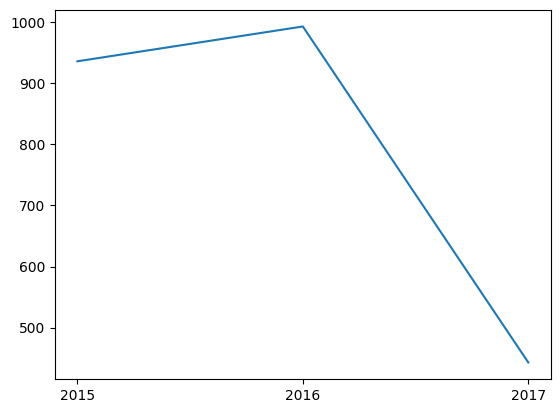

2015 936
2016 993
2017 443


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/startup_funding.csv")

df_yr = df['Date'].str[-4:]
count = df_yr.value_counts().sort_index()

plt.plot(count.index , count.values)
plt.show()

for i in range(len(count)):
  print((count.index[i]) , (count.values[i]))

In [ ]:
df

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35


<ipython-input-5-6add164735b2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city[delhi] = "New Delhi"
<ipython-input-5-6add164735b2>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city[bgl] = "Bangalore"


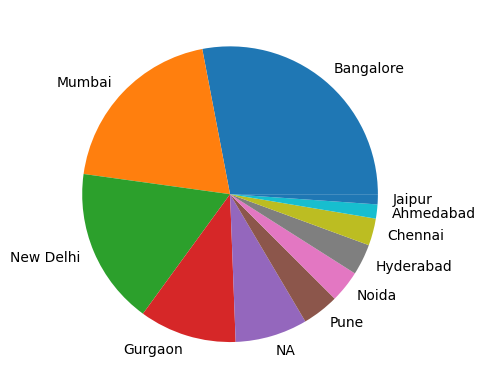

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/startup_funding.csv")

df = data.copy()
df_city = df['CityLocation']
df_city.fillna('NA', inplace= True)

delhi = df_city.str.contains('Delhi')
df_city[delhi] = "New Delhi"

bgl = df_city.str.contains('bangalore')
df_city[bgl] = "Bangalore"

df_city = (df_city.str.split('/',expand=True)[0]).str.strip()

val = df_city.value_counts()
for i in range(10):
  if val.index[i] == 'NA':
    continue
  print(val.index[i], val.values[i])

pie = val[:11]
plt.pie(pie.values, labels = pie.index)
plt.show()

In [ ]:
import pandas as pd
import numpy as np

df_start=pd.read_csv('startup_funding.csv',encoding='utf-8')
df_start['CityLocation'].dropna(inplace=True)

def separateCity(city):
  return city.split('/')[0].strip()

df_start['CityLocation'] = df_start['CityLocation'].apply(separateCity)
df_start['CityLocation'].replace("Delhi","New Delhi",inplace=True)
df_start['CityLocation'].replace("bangalore","Bangalore",inplace=True)

city_number=df_start['CityLocation'].value_counts()[0:10]
city=city_number.index
numCity=city_number.values

for i in range(len(city)):
  print(city[i],numCity[i])

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/startup_funding.csv")

df = data.copy()
df_city = df['CityLocation']
df_city.fillna('NA', inplace= True)

delhi = df_city.str.contains('Delhi')
df_city[delhi] = "New Delhi"

bgl = df_city.str.contains('bangalore')
df_city[bgl] = "Bangalore"

df_city = (df_city.str.split('/',expand=True)[0]).str.strip()

val = df_city.value_counts()
s = val.values.sum()

for i in range(11):
  if val.index[i] == 'NA':
    continue
  pct = val[i]*100/s
  print((val.index[i]).strip() , "%.2f" %pct)

Bangalore 26.77
Mumbai 18.93
New Delhi 16.40
Gurgaon 10.16
Pune 3.84
Noida 3.33
Hyderabad 3.25
Chennai 2.82
Ahmedabad 1.48
Jaipur 1.05


<ipython-input-77-7b80d7bde92a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city[delhi] = "New Delhi"
<ipython-input-77-7b80d7bde92a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city[bgl] = "Bangalore"


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/startup_funding.csv")
df = data.copy()

df_city = df['CityLocation']
df_city.fillna('NA', inplace= True)
delhi = df_city.str.contains('Delhi')
df_city[delhi] = "New Delhi"
bgl = df_city.str.contains('bangalore')
df_city[bgl] = "Bangalore"
df_city = (df_city.str.split('/',expand=True)[0]).str.strip()

df['AmountInUSD'] = df['AmountInUSD'].str.replace(',', '').astype(float)
df_fund = df['AmountInUSD']
df_fund.fillna(0, inplace= True)

df_n = pd.DataFrame(df_city)
df_n['amt'] = df_fund

val = df_n.groupby(0).sum()
arr = val.sort_values(by = 'amt' , ascending = False)[:11]
arr.drop('NA' , inplace=True)
s = arr.sum()

for i in range(10):
  if arr.index[i] == 'NA':
    continue
  pct = arr.values[i]*100/s
  print((arr.index[i]).strip() , "%.2f" %pct)

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


In [ ]:
import pandas as pd
import numpy as np

df_start=pd.read_csv('/content/startup_funding.csv',encoding='utf-8')

df_start['CityLocation'].dropna(inplace=True)
def separateCity(city):
  return city.split('/')[0].strip()

df_start['CityLocation']=df_start['CityLocation'].apply(separateCity)
df_start['CityLocation'].replace("Delhi","New Delhi",inplace=True)
df_start['CityLocation'].replace("bangalore","Bangalore",inplace=True)

## Converting "AmountInUSD" into numeric format
df_start["AmountInUSD"] = df_start["AmountInUSD"].apply(lambda x: float(str(x).replace(",","")))
df_start["AmountInUSD"] = pd.to_numeric(df_start["AmountInUSD"])

city_amount=df_start.groupby('CityLocation')['AmountInUSD'].sum().sort_values(ascending=False)[0:10]
city=city_amount.index
amountCity=city_amount.values
perAmount=np.true_divide(amountCity, amountCity.sum())*100

for i in range(len(city)):
  print(city[i],format(perAmount[i],'.2f'))

Bangalore 21.51
Mumbai 18.46
New Delhi 13.81
Gurgaon 11.19
Pune 5.52
Chennai 5.09
Hyderabad 5.09
Noida 4.51
Ahmedabad 3.2

Bangalore 26.77
Mumbai 18.93
New Delhi 16.40
Gurgaon 10.16
Pune 3.84
Noida 3.33
Hyderabad 3.25
Chennai 2.82
Ahmedabad 1.48
Jaipur 1.05

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


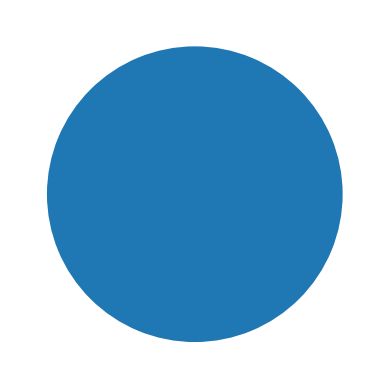

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

data = pd.read_csv("/content/startup_funding.csv")
df = data.copy()

df_type = df['InvestmentType']
df_type.fillna('NA', inplace= True)

df_type[df_type == 'PrivateEquity'] = 'Private Equity'
df_type[df_type == 'Crowd funding'] = 'Crowd Funding'
df_type[df_type == 'SeedFunding'] = 'Seed Funding'

df['AmountInUSD'] = df['AmountInUSD'].str.replace(',', '').astype(float)
df_funds = df['AmountInUSD']
df_funds.fillna(0, inplace= True)

df_inttype = pd.DataFrame(df_type)
df_inttype['amt'] = df_funds

grpdval = df_inttype.groupby('InvestmentType').sum()

arrr = grpdval.sort_values(by = 'amt' , ascending = False)
s = arrr.sum()

for i in range(len(arrr)):
  if arrr.index[i] == 'NA':
    continue
  pct = arrr.values[i]*100/s
  print((arrr.index[i]).strip() , "%.2f" %pct)

plt.pie(arrr.values[0])
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# pd.options.mode.chained_assignment = None  # default='warn'

data = pd.read_csv("/content/startup_funding.csv")
df = data.copy()

df_industry = df['IndustryVertical']
df_industry.fillna('NA', inplace= True)

df_industry = df_industry.replace('eCommerce' ,'Ecommerce')
df_industry = df_industry.replace('ecommerce' ,'Ecommerce')
df_industry = df_industry.replace('ECommerce' ,'Ecommerce')

df['AmountInUSD'] = df['AmountInUSD'].str.replace(',', '').astype(float)
df_funding = df['AmountInUSD']
df_funding.fillna(0, inplace= True)

df_indamt = pd.DataFrame(df_industry)
df_indamt['amt'] = df_funding

industryval = df_indamt.groupby('IndustryVertical').sum()
industryval = industryval.sort_values(by = 'amt' , ascending =False)

arrry = industryval.sort_values(by = 'amt' , ascending = False)[:6]
arrry.drop('NA' , inplace=True)
su = arrry.sum()

for i in range(len(arrry)):
  if arrry.index[i] == 'NA':
    continue
  pct = arrry.values[i]*100/su
  print((arrry.index[i]).strip() , "%.2f" %pct)


Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

data = pd.read_csv("/content/startup_funding.csv")
df = data.copy()

df_stup = df['StartupName']

df_stup = df_stup.replace('Paytm Marketplace' ,'Paytm')
df_stup = df_stup.replace('OYO Rooms' ,'Oyo')
df_stup = df_stup.replace('Oyo Rooms' ,'Oyo')
df_stup = df_stup.replace('OyoRooms' ,'Oyo')
df_stup = df_stup.replace('Oyorooms' ,'Oyo')
df_stup = df_stup.replace('Flipkart.com' ,'Flipkart')
df_stup = df_stup.replace('Ola Cabs' ,'Ola')
df_stup = df_stup.replace('Olacabs' ,'Ola')

df['AmountInUSD'] = df['AmountInUSD'].str.replace(',', '').astype(float)
df_fundstp = df['AmountInUSD']
df_fundstp.fillna(0, inplace= True)

df_stpfund = pd.DataFrame(df_stup)
df_stpfund['amt'] = df_fundstp

startupval = df_stpfund.groupby('StartupName').sum()
startupval = startupval.sort_values(by = 'amt' , ascending =False)

arrray = startupval.sort_values(by = 'amt' , ascending = False)[:5]
suu = arrray.sum()

for i in range(len(arrray)):
  print((arrray.index[i]).strip())


Paytm
Flipkart
Ola
Snapdeal
Oyo


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

data = pd.read_csv("/content/startup_funding.csv")
df = data.copy()

df_stup = df['StartupName']

df_stup = df_stup.replace('Paytm Marketplace' ,'Paytm')
df_stup = df_stup.replace('OYO Rooms' ,'Oyo')
df_stup = df_stup.replace('Oyo Rooms' ,'Oyo')
df_stup = df_stup.replace('OyoRooms' ,'Oyo')
df_stup = df_stup.replace('Oyorooms' ,'Oyo')
df_stup = df_stup.replace('Flipkart.com' ,'Flipkart')
df_stup = df_stup.replace('Ola Cabs' ,'Ola')
df_stup = df_stup.replace('Olacabs' ,'Ola')


a = df_stup.value_counts().sort_values(ascending = False)

for i in range(5):
  print((a.index[i]).strip(), a.values[i])

Ola 9
Swiggy 7
UrbanClap 6
Paytm 6
Oyo 6


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

data = pd.read_csv("/content/startup_funding.csv", skipinitialspace= True)
df = data.copy()

df_investor = df['InvestorsName']
df_investor.fillna('NA', inplace= True)
df_i = df_investor.str.split(',',expand=True)
li = []
for i in range(10):
  for j in df_i[i]:
    li.append(str(j).strip())

df_allinvst = pd.DataFrame(li, columns =['investor'])

y = df_allinvst.groupby('investor')['investor'].count()
y = y.sort_values(ascending= False)

print(y.index[1], y.values[1])

Sequoia Capital 64


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

data = pd.read_csv("startup_funding.csv")
df = data.copy()

df_investor = df['InvestorsName']
df_investor.fillna('NA', inplace= True)
df_i = df_investor.str.split(',',expand=True)
li = []

for i in range(10):
  for j in df_i[i]:
    li.append(str(j).strip())


df_allinvst = pd.DataFrame(li, columns =['investor'])

x = df_allinvst.value_counts().sort_values(ascending = False)

print(x.index[1][0], x.values[1])


Sequoia Capital 64


In [ ]:
import csv
file=open("/content/startup_funding.csv")
file_data=csv.DictReader(file,skipinitialspace=True)

dic={}
year=[]

for row in file_data:
  a=row['InvestorsName']

  if a!="Undisclosed Investors" or a!="Undisclosed investors":
    for i in row['InvestorsName'].split(','):
       year.append(i.strip())

for a in year:
 if a in dic.keys():
     dic[a]+=1
 else:
     dic[a]=1
ans=max(dic,key=dic.get)
print(ans,end="  ")
print(dic[ans])


Sequoia Capital  64


In [ ]:
import pandas as pd
import numpy as np

df_start=pd.read_csv('startup_funding.csv',encoding='utf-8')

df_start['InvestorsName'].dropna(inplace=True)

def createDictionary(array):
  dictionary={}
  for i in array:
    if ',' not in str(i):
      if i in dictionary:
        dictionary[i]=dictionary.get(i)+1
      else:
        dictionary[i]=1
    else:
      string=i.strip().split(',')
      for j in string:
        if j.strip() in dictionary:
          dictionary[j.strip()]=dictionary.get(j.strip())+1
        else:
          dictionary[j.strip()]=1
  return dictionary

dictionary=createDictionary(df_start['InvestorsName'])
dataf=pd.DataFrame(list(dictionary.values()),list(dictionary.keys()))
dataf=dataf.sort_values(by=[0],ascending=False)
print(dataf.index[0],dataf.values[0][0])

Sequoia Capital 64
